This notebook was created for the study of a galaxy Seyfert Type II.

In [1]:
from astro_constants import *
from source_parameters import *
from rates import *

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as const
from scipy.stats import chisquare
from scipy.optimize import curve_fit

Defining our source

In [3]:
## Initialize the class
coronal_data = Coronal_Description(r_x, l, l_x, mdot, m)

## Calculate parameters for emission region
B_c = coronal_data.coronal_mag_field()
n_c = coronal_data.coronal_density()
T_c = coronal_data.coronal_temperature()
delta_RX = coronal_data.width_current_sheet()
wdot_B = coronal_data.mag_rec_power()

print(f'\nCoronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'\nCoronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'\nCoronal Temperature:\n T_c = {T_c:.4E} K')
print(f'\nWidth of the current sheet:\n delta_RX = {delta_RX:.4E} cm')
print(f'\nReconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')


Coronal Magnetic Field:
 B_c = 1.0478E+04 G

Coronal Particle Number Density:
 n_c = 3.4392E+10 cm-3

Coronal Temperature:
 T_c = 2.5282E+09 K

Width of the current sheet:
 delta_RX = 1.6649E+11 cm

Reconnection Power:
 wdot_B = 5.9912E+42 erg s-1


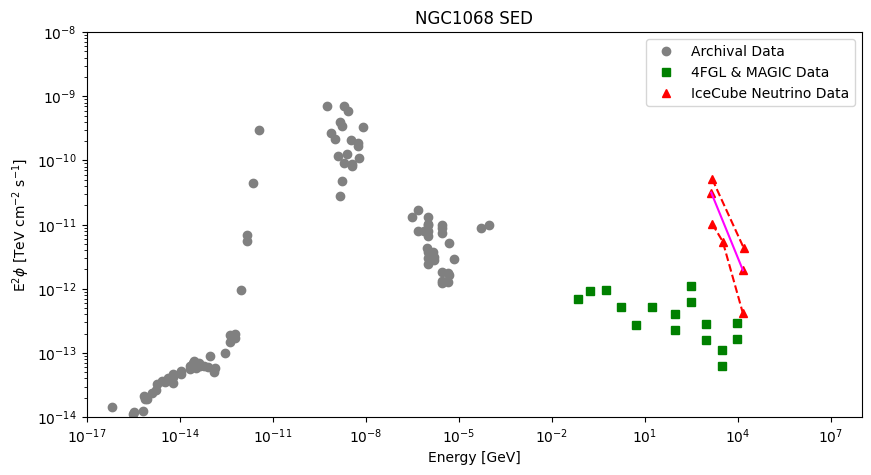

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
archival_data = pd.read_csv('observed_SED/archival_data.csv', header=None)
magic_data = pd.read_csv('observed_SED/4FGL_MAGIC_data.csv', header=None)
icecube_data = pd.read_csv('observed_SED/IceCube_neutrinos_data.csv', header=None)

# Plot the data
plt.figure(figsize=(10, 5))

# Archival data
plt.plot(archival_data[0], archival_data[1], 'o', label='Archival Data', color='gray')

# 4FGL & MAGIC data
plt.plot(magic_data[0], magic_data[1], 's', label='4FGL & MAGIC Data', color='green')

# IceCube Neutrino data
plt.plot(icecube_data[0], icecube_data[1], '^', label='IceCube Neutrino Data', color='red')
plt.plot(icecube_data[0][0:2], icecube_data[1][0:2], '--', color='red')
plt.plot(icecube_data[0][2:4], icecube_data[1][2:4], '-', color='magenta')
plt.plot(icecube_data[0][4:7], icecube_data[1][4:7], '--', color='red')

# Set the scales and labels
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-17, 1e8)
plt.ylim(1e-14, 1e-8)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'E$^2 \phi$ [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('NGC1068 SED')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [5]:
icecube_data

,0,1
0,1518.503961,5.134833e-11
1,15978.640399,4.281332e-12
2,1413.977432,3.162278e-11
3,14878.747433,1.947483e-12
4,1518.503961,1.030761e-11
5,3327.544666,5.455595e-12
6,14878.747433,4.153565e-13


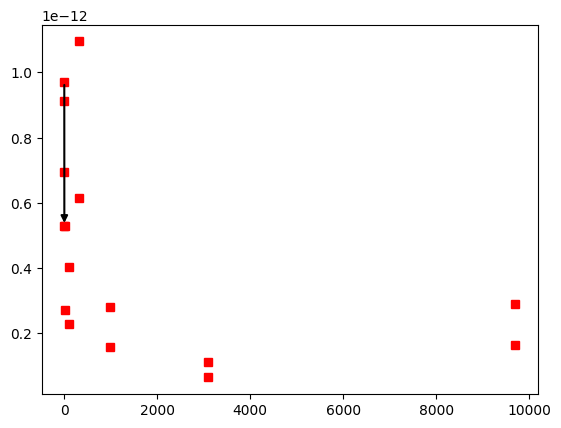

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming magic_data is already loaded as a DataFrame

# Example to plot an arrow indicating an upper limit between two specific points (e.g., index 2 and 3)
plt.plot(magic_data[0], magic_data[1], 's', label='4FGL & MAGIC Data', color='red')  # Plot the data

# Coordinates for the arrow (e.g., from index 2 to index 3)
x_start, y_start = magic_data[0][2], magic_data[1][2]
x_end, y_end = magic_data[0][3], magic_data[1][3]

# Plot an arrow
plt.annotate(
    '', 
    xy=(x_end, y_end), 
    xytext=(x_start, y_start),
    arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5)
)

# Display the plot
plt.show()
